# Lab#2 <br>
### Noam Yan

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Problem 1

1A.  X = 3.9, Y = 6.6

In [3]:
X = 3.9
Y = 4.2
days = np.arange(1,6,1)

xrange = np.linspace(0,10,11)

In [11]:
def _conv (xrange, sumOrAvg, pdf, times):
    '''
    sumOrAvg:  0 means sum, 1 means Avg.
    times: can be a list or an integer.
    '''
    conv_pdf = pdf
    if type(times) is int:
        for i in range(times-1):
            conv_pdf = np.convolve(conv_pdf,pdf)
        conv_xrange = np.linspace(xrange[0]*times,xrange[-1]*times, conv_pdf.shape[0]) if sumOrAvg==0 else np.linspace(xrange[0],xrange[-1], conv_pdf.shape[0])
        return conv_xrange, conv_pdf                                                                                                               
    else:
        ans_dist = {"conv_xrange":[], "conv_pdf":[]}                                                                                                               
        for i in times:
            for j in range(i-1):
                conv_pdf = np.convolve(conv_pdf,pdf)
            conv_xrange = np.linspace(xrange[0]*i,xrange[-1]*i, conv_pdf.shape[0]) if sumOrAvg==0 else np.linspace(xrange[0],xrange[-1], conv_pdf.shape[0])
            ans_dist['conv_xrange'].append(conv_xrange)
            ans_dist['conv_pdf'].append(conv_pdf)
        return ans_dist['conv_xrange'], ans_dist['conv_pdf']

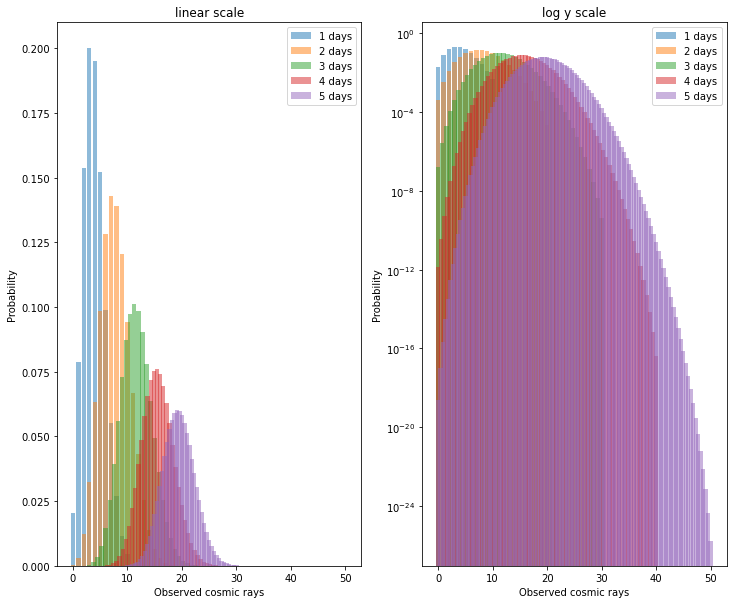

In [15]:
conv_xrange, conv_pdf = _conv(xrange,0,stats.poisson.pmf(k=xrange,mu=X,loc=0),days)

plt.rcParams["figure.figsize"] = (12,10)
fig, ax = plt.subplots(1, 2)
for i,day in enumerate(days):
    ax[0].bar(conv_xrange[i],conv_pdf[i],label = '%s days' %day,alpha=.5)
    ax[1].bar(conv_xrange[i],conv_pdf[i],label = '%s days' %day,alpha=.5)
ax[0].set_title('linear scale')
ax[1].set_title('log y scale')
ax[0].legend()
ax[1].legend()
ax[1].set_yscale('log')
plt.setp(ax, xlabel="Observed cosmic rays",ylabel="Probability")
plt.show()


From the linear scale plot, the probability distribution of the background shifts to the right and decreases in amount as I integrate (sum) for more days. From the log y scale plot, the probability distributiononly shifts to the right. 

1B.

According to the plots above, the distribution still shows the Poisson-like shape due to the discrepancy. This makes sense mathematically, because:
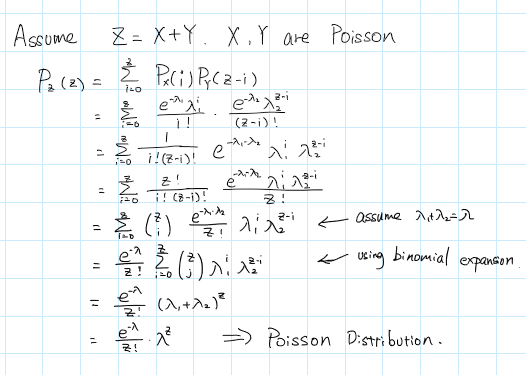
Similarly, we can conclude after 5 days, the summed probability distribution is still a Poisson distribution. 

1C.

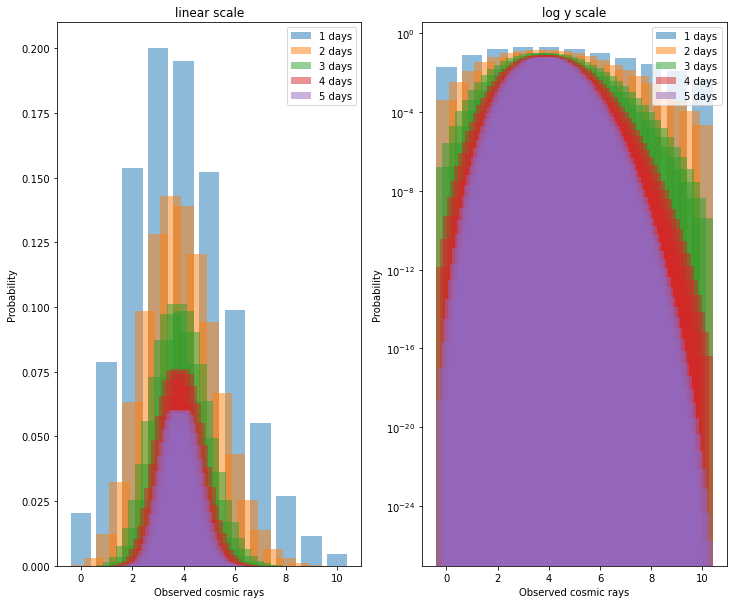

In [16]:
conv_xrange, conv_pdf = _conv(xrange,1,stats.poisson.pmf(k=xrange,mu=X,loc=0),days)

plt.rcParams["figure.figsize"] = (12,10)
fig, ax = plt.subplots(1, 2)
for i,day in enumerate(days):
    ax[0].bar(conv_xrange[i],conv_pdf[i],label = '%s days' %day,alpha=.5)
    ax[1].bar(conv_xrange[i],conv_pdf[i],label = '%s days' %day,alpha=.5)
ax[0].set_title('linear scale')
ax[1].set_title('log y scale')
ax[0].legend()
ax[1].legend()
ax[1].set_yscale('log')
plt.setp(ax, xlabel="Observed cosmic rays",ylabel="Probability")
plt.show()


Compared with Integration, in which the shape shifts to the right, the mean value of Average convolution keeps the same, and the shape is much narrower, which can be determined by the scale of x-axis. 

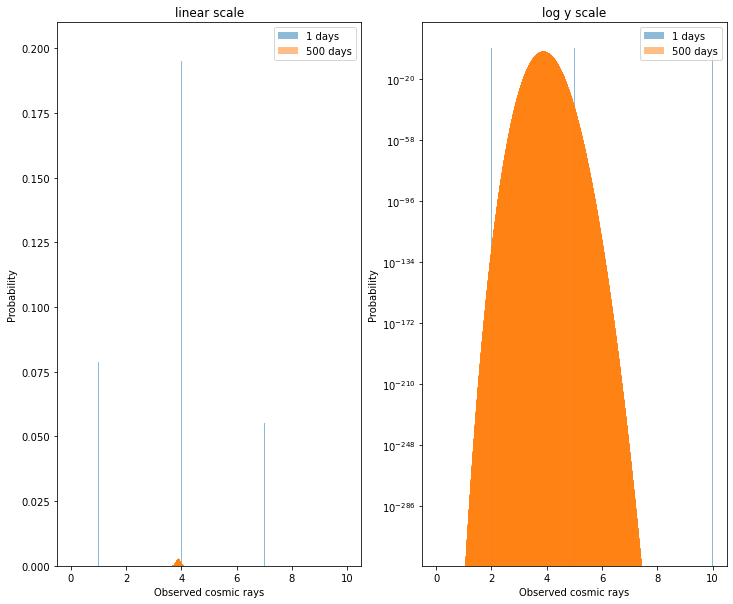

In [19]:
conv_xrange, conv_pdf = _conv(xrange,1,stats.poisson.pmf(k=xrange,mu=X,loc=0),[1,500])
plt.rcParams["figure.figsize"] = (12,10)
fig, ax = plt.subplots(1, 2)
for i,day in enumerate([1,500]):
    ax[0].bar(conv_xrange[i],conv_pdf[i],label = '%s days' %day,alpha=.5,width=0.01)
    ax[1].bar(conv_xrange[i],conv_pdf[i],label = '%s days' %day,alpha=.5,width=0.01)
ax[0].set_title('linear scale')
ax[1].set_title('log y scale')
ax[0].legend()
ax[1].legend()
ax[1].set_yscale('log')
plt.setp(ax, xlabel="Observed cosmic rays",ylabel="Probability")
plt.show()

1D. N=4

In [152]:
N = 4
Y*N

16.8

In [153]:
conv_pmf = pmf
for i in range(N-1):
    conv_pmf = np.convolve(conv_pmf,pmf)

prob = 1-stats.poisson.cdf(k=Y*N,mu=X,loc=0)
prob

8.085161854465284e-07

In [155]:
sigV = stats.norm.isf(q=prob,loc=0,scale=1)
print(sigV)

4.796200740579053


The observation point is at 4.79sigma away from mean.

## Problem 2

In [7]:
delta = 1e-2
xrange = np.linspace(0,10,int(10/delta)+1)
interval = [1,5,10,100,200,500]

pdf = stats.rayleigh.pdf(x=xrange, loc = 3, scale=1)
pmf = pdf*delta


D:\Softwares\Anacoda\envs\tf2\lib\site-packages\matplotlib\ticker.py:1106: RuntimeWarning: divide by zero encountered in double_scalars
  coeff = round(x / b ** exponent)


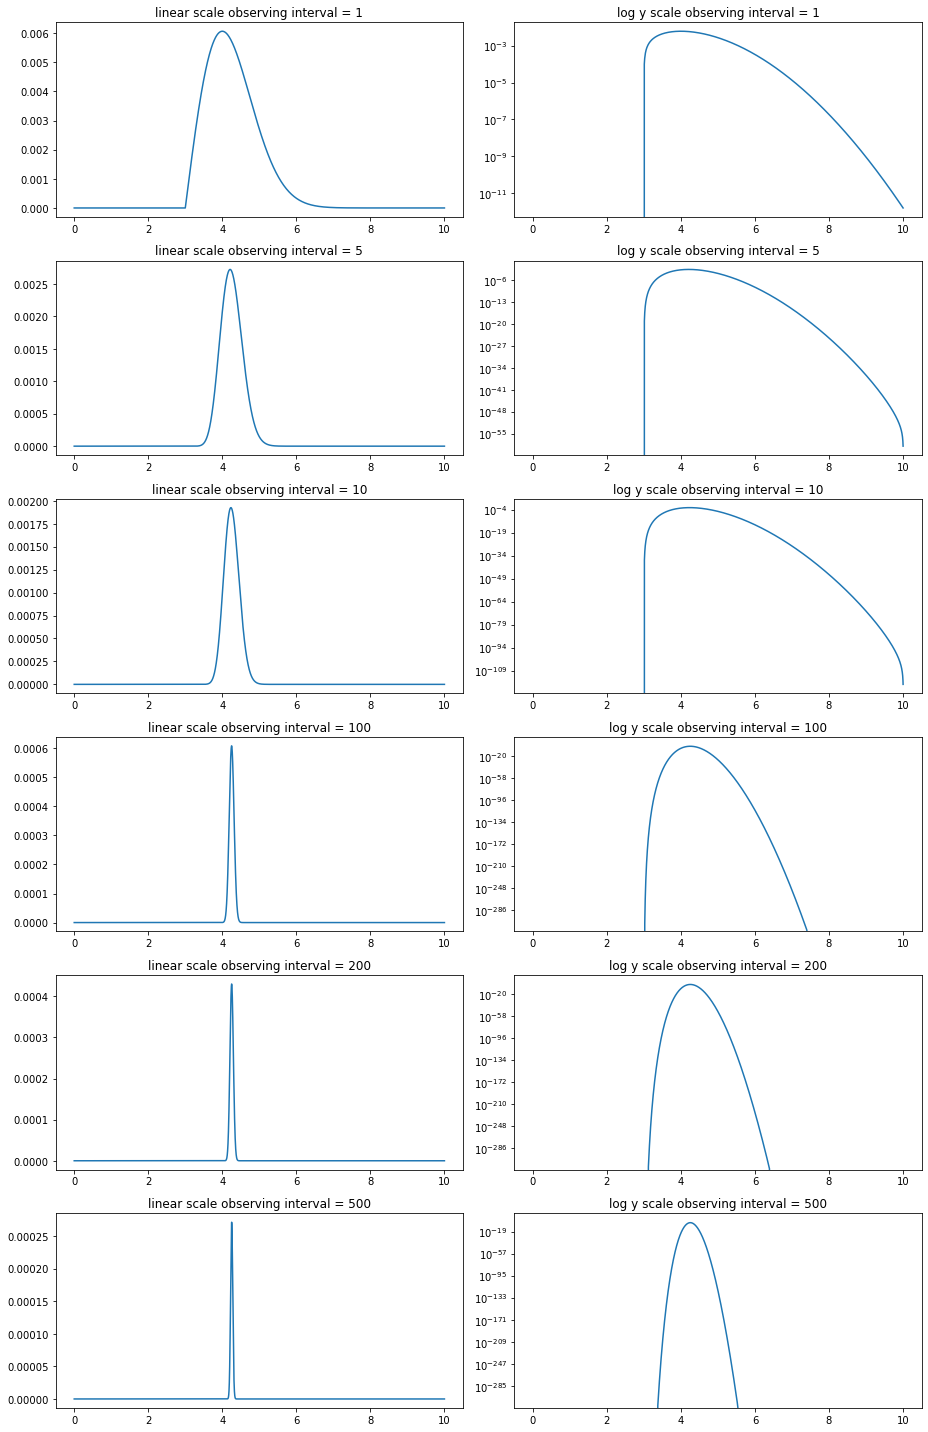

In [8]:
plt.rcParams["figure.figsize"] = (13,20)
fig, ax = plt.subplots(len(interval), 2)
for i,val in enumerate(interval):
    conv_pmf = pmf
    if val-1 != 0:
        for j in range(val-1):
            conv_pmf = np.convolve(conv_pmf,pmf)
    conv_pdf = pmf/delta
    ax[i,0].plot(np.linspace(0,10,conv_pmf.shape[0]),conv_pmf)
    ax[i,1].plot(np.linspace(0,10,conv_pmf.shape[0]),conv_pmf)
    ax[i,0].set_title('linear scale observing interval = %s'%val)
    ax[i,1].set_yscale('log')
    ax[i,1].set_title('log y scale observing interval = %s'%val)
fig.tight_layout()

2A&B.

As the interval increases, the shape with both linear axes and log y-axis get narrower. It is clear that the shape is approaching to Gaussian distribution. As far as I can test now, after 500 summation, the shape is almost the same as Gaussian. 

In [40]:
xrange = np.linspace(-1,1,101)
pdf = stats.norm.pdf(xrange,loc=0,scale=.1)
pdf = pdf/np.sum(pdf)
conv_xrange,conv_pdf = _conv(xrange,1,pdf,[1,2])


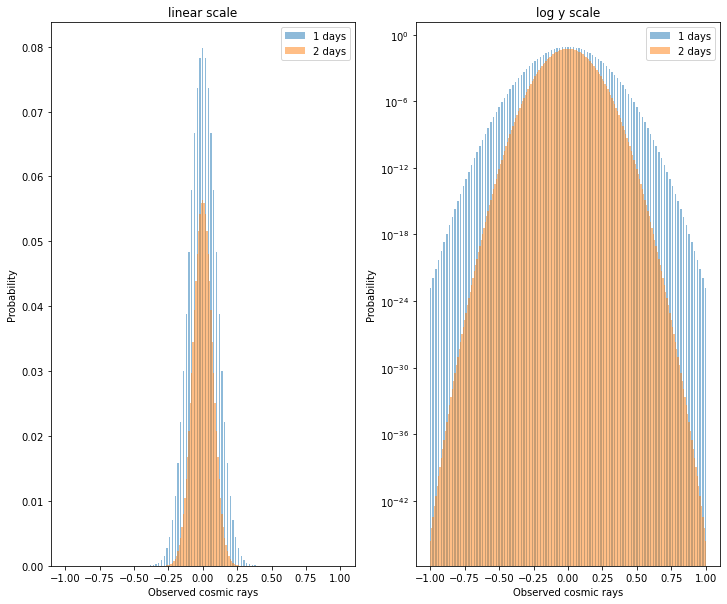

In [41]:
plt.rcParams["figure.figsize"] = (12,10)
fig, ax = plt.subplots(1, 2)
for i,day in enumerate([1,2]):
    ax[0].bar(conv_xrange[i],conv_pdf[i],label = '%s days' %day,alpha=.5,width=0.01)
    ax[1].bar(conv_xrange[i],conv_pdf[i],label = '%s days' %day,alpha=.5,width=0.01)
ax[0].set_title('linear scale')
ax[1].set_title('log y scale')
ax[0].legend()
ax[1].legend()
ax[1].set_yscale('log')
plt.setp(ax, xlabel="Observed cosmic rays",ylabel="Probability")
plt.show()


In [23]:
xrange = np.linspace(-1,1,101)
pdf = stats.norm.pdf(xrange,loc=0,scale=.1)

mean = np.sum(xrange*pdf)
var = np.mean(xrange**2) - mean**2
print(var)
print(stats.norm.var(loc=0,scale=.1))

0.34
0.010000000000000002
